In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr

In [2]:
df = pd.read_csv('../Streamflow_Data/Streamflow_Drought_Data_CRB/Spatial_Data/colorado_river_100mi.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AREA       1246 non-null   float64
 1   PERIMETER  1246 non-null   float64
 2   GAGE_ID    1246 non-null   int64  
 3   gage_num   1246 non-null   int64  
 4   area_sqkm  1246 non-null   float64
 5   lat_cent   1246 non-null   float64
 6   long_cent  1246 non-null   float64
 7   area_km2   1246 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 78.0 KB


In [4]:
df.head(10)

,AREA,PERIMETER,GAGE_ID,gage_num,area_sqkm,lat_cent,long_cent,area_km2
0,2.411960e+09,418740.0,6038500,6038500,2411.96,44.6619,-110.950,2411.96
1,3.010990e+09,530460.0,6038800,6038800,3011.00,44.6941,-111.049,3011.00
2,5.728700e+09,842580.0,6040800,6040800,5728.70,44.9092,-111.353,5728.70
3,5.729270e+09,841920.0,6041000,6041000,5729.27,44.9093,-111.353,5729.27
4,3.807470e+10,2036640.0,6054500,6054500,38074.70,45.3635,-112.159,38074.70
5,4.332440e+10,2032740.0,6065500,6065500,43324.40,45.4977,-112.105,43324.40
6,4.398520e+10,2085060.0,6066500,6066500,43985.20,45.5190,-112.101,43985.20
7,2.567460e+09,444480.0,6186500,6186500,2567.46,44.2976,-110.170,2567.46
8,9.209020e+09,948480.0,6192500,6192500,9209.02,44.8437,-110.408,9209.02
9,2.985020e+09,425400.0,6207500,6207500,2985.02,44.8461,-109.526,2985.02


## RioXarray to Load TIFF

In [5]:
tiff_file = rxr.open_rasterio(
    '../Landsat_Data/DSWE_CRB/LC08_CU_005009_20130513_20181211_C01_V01_INWM.tif', 
    masked=True
)

In [6]:
tiff_file.rio.crs

CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [7]:
tiff_file.rio.nodata

nan

In [8]:
tiff_file.rio.bounds()

(-1815585.0, 1814805.0, -1665585.0, 1964805.0)

In [9]:
tiff_file.rio.resolution()

(30.0, -30.0)

In [10]:
tiff_file.shape

(1, 5000, 5000)

In [11]:
tiff_file.attrs

{'scale_factor': 1.0,
 'add_offset': 0.0,
 'long_name': 'dynamic surface water extent: filtered by: percent slope - hillshade - cloud - cloud shadow - snow'}

In [12]:
tiff_file.rio.count   # Number of bands, makes sense because all bands in this dataset were combined into a mask

1

In [13]:
tiff_file

<xarray.DataArray (band: 1, y: 5000, x: 5000)>
[25000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -1.816e+06 -1.816e+06 ... -1.666e+06 -1.666e+06
  * y            (y) float64 1.965e+06 1.965e+06 ... 1.815e+06 1.815e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     dynamic surface water extent: filtered by: percent slope -...

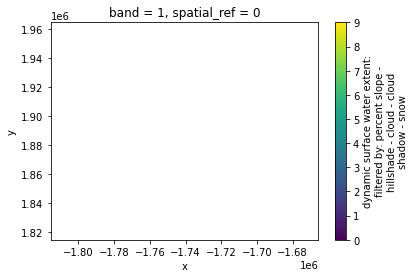

In [14]:
tiff_file.plot()

## Matplotlib to Load TIFF

In [15]:
imarray = plt.imread('../Landsat_Data/DSWE_CRB/LC08_CU_005009_20130513_20181211_C01_V01_INWM.tif')
imarray

array([[  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [16]:
imarray.shape

(5000, 5000)

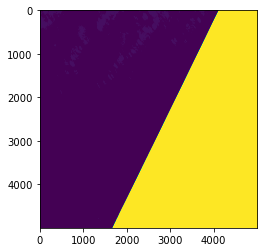

In [17]:
plt.imshow(imarray)